## MINI Project

## Choose dataset of choice
## Apply varity of classification of aglorothm, including Logistic Regression, Naive byes, SVM, KNN, Decision Tree, Random Forest and adaboost
## -Access this performance using classification Matrix
## -Compare the performace of the entire classification algorithm

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
import warnings

In [26]:
warnings.filterwarnings('ignore')

In [27]:
df = pd.read_csv('weather_classification_data.csv')

In [28]:
df.shape

(13200, 11)

In [29]:
df.head()

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type
0,14.0,73,9.5,82.0,partly cloudy,1010.82,2,Winter,3.5,inland,Rainy
1,39.0,96,8.5,71.0,partly cloudy,1011.43,7,Spring,10.0,inland,Cloudy
2,30.0,64,7.0,16.0,clear,1018.72,5,Spring,5.5,mountain,Sunny
3,38.0,83,1.5,82.0,clear,1026.25,7,Spring,1.0,coastal,Sunny
4,27.0,74,17.0,66.0,overcast,990.67,1,Winter,2.5,mountain,Rainy


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13200 entries, 0 to 13199
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Temperature           13200 non-null  float64
 1   Humidity              13200 non-null  int64  
 2   Wind Speed            13200 non-null  float64
 3   Precipitation (%)     13200 non-null  float64
 4   Cloud Cover           13200 non-null  object 
 5   Atmospheric Pressure  13200 non-null  float64
 6   UV Index              13200 non-null  int64  
 7   Season                13200 non-null  object 
 8   Visibility (km)       13200 non-null  float64
 9   Location              13200 non-null  object 
 10  Weather Type          13200 non-null  object 
dtypes: float64(5), int64(2), object(4)
memory usage: 1.1+ MB


In [31]:
df.isnull().sum()

Temperature             0
Humidity                0
Wind Speed              0
Precipitation (%)       0
Cloud Cover             0
Atmospheric Pressure    0
UV Index                0
Season                  0
Visibility (km)         0
Location                0
Weather Type            0
dtype: int64

In [32]:
df[df.duplicated()]

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type


In [33]:
df.duplicated().sum()

0

In [34]:
df.nunique()

Temperature              126
Humidity                  90
Wind Speed                97
Precipitation (%)        110
Cloud Cover                4
Atmospheric Pressure    5456
UV Index                  15
Season                     4
Visibility (km)           41
Location                   3
Weather Type               4
dtype: int64

In [35]:
df['Cloud Cover'].unique()

array(['partly cloudy', 'clear', 'overcast', 'cloudy'], dtype=object)

In [36]:
df['Cloud Cover'] = df['Cloud Cover'].replace('partly cloudy',0)
df['Cloud Cover'] = df['Cloud Cover'].replace('clear',1)
df['Cloud Cover'] = df['Cloud Cover'].replace('overcast',2)
df['Cloud Cover'] = df['Cloud Cover'].replace('cloudy',3)

In [37]:
df['Season'].unique()

array(['Winter', 'Spring', 'Summer', 'Autumn'], dtype=object)

In [38]:
df['Season'] = df['Season'].replace('Winter', 0)
df['Season'] = df['Season'].replace('Spring', 1)
df['Season'] = df['Season'].replace('Summer', 2)
df['Season'] = df['Season'].replace('Autumn', 3)

In [39]:
df['Location'].unique()

array(['inland', 'mountain', 'coastal'], dtype=object)

In [40]:
df['Location'] = df['Location'].replace('inland', 0)
df['Location'] = df['Location'].replace('mountain', 1)
df['Location'] = df['Location'].replace('coastal', 2)

In [41]:
df['Weather Type'].unique()

array(['Rainy', 'Cloudy', 'Sunny', 'Snowy'], dtype=object)

In [42]:
df['Weather Type'] = df['Weather Type'].replace('Rainy', 0)
df['Weather Type'] = df['Weather Type'].replace('Cloudy', 1)
df['Weather Type'] = df['Weather Type'].replace('Sunny', 2)
df['Weather Type'] = df['Weather Type'].replace('Snowy', 3)

In [43]:
df.head(10)

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type
0,14.0,73,9.5,82.0,0,1010.82,2,0,3.5,0,0
1,39.0,96,8.5,71.0,0,1011.43,7,1,10.0,0,1
2,30.0,64,7.0,16.0,1,1018.72,5,1,5.5,1,2
3,38.0,83,1.5,82.0,1,1026.25,7,1,1.0,2,2
4,27.0,74,17.0,66.0,2,990.67,1,0,2.5,1,0
5,32.0,55,3.5,26.0,2,1010.03,2,2,5.0,0,1
6,-2.0,97,8.0,86.0,2,990.87,1,0,4.0,0,3
7,3.0,85,6.0,96.0,0,984.46,1,0,3.5,0,3
8,3.0,83,6.0,66.0,2,999.44,0,0,1.0,1,3
9,28.0,74,8.5,107.0,1,1012.13,8,0,7.5,2,2


# EDA

<Axes: >

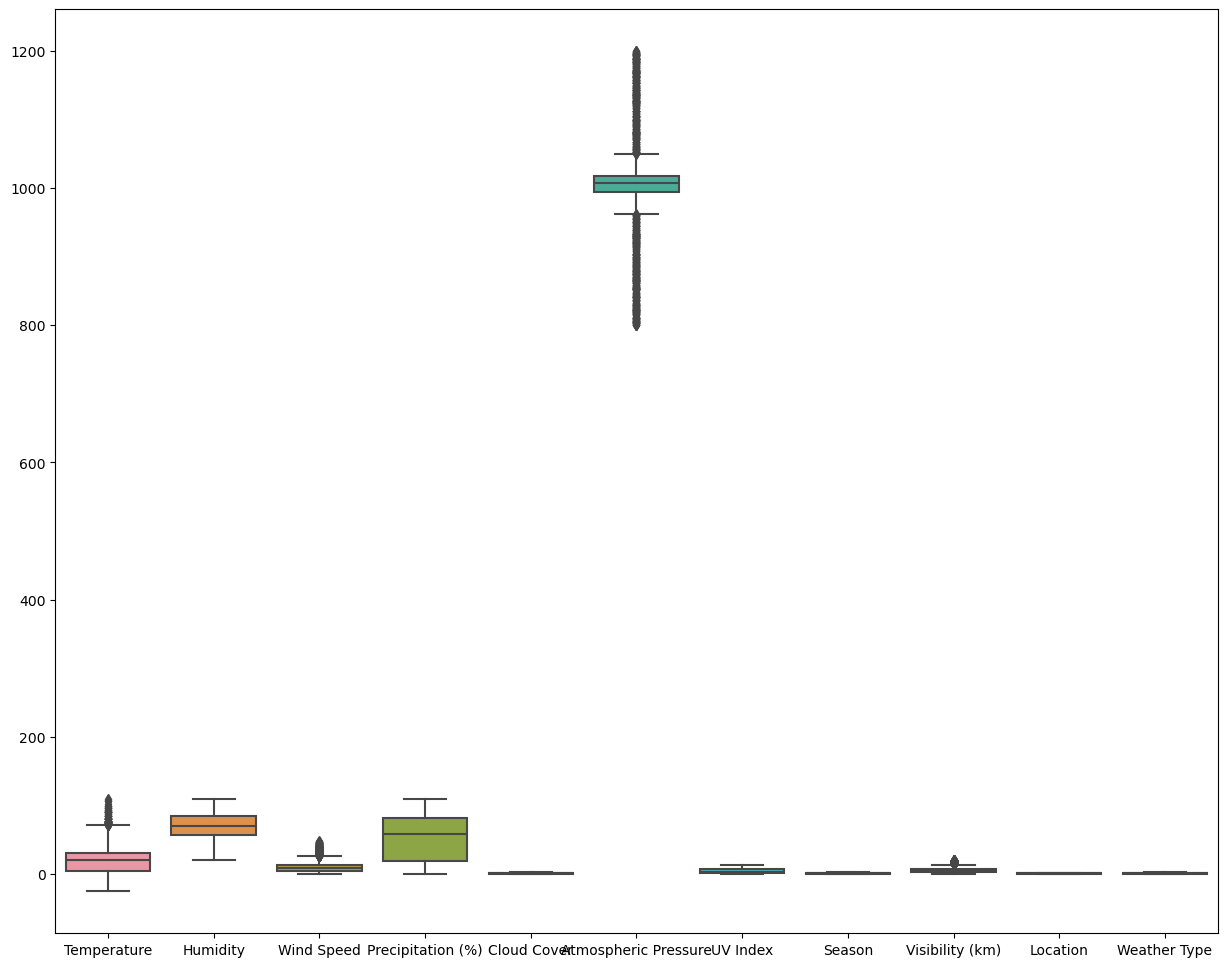

In [44]:
plt.figure(figsize=(15,12))
sns.boxplot(data=df)

In [46]:
def find_outliers_zscore(df, threshold=3):
    outliers_list = []  # To store the outliers
    
    for column in df.columns:
        # Calculate Z-scores for each column
        z_scores = np.abs(stats.zscore(df[column]))
        
        # Filter outliers based on the threshold
        outliers_in_column = df[z_scores > threshold]
        
        # Append the outliers to the list
        outliers_list.append(outliers_in_column)
    
    # Concatenate all outliers into one DataFrame and drop duplicates
    outliers = pd.concat(outliers_list).drop_duplicates()

    # Filter the rows without outliers for all columns
    z_scores_all = np.abs(stats.zscore(df))
    df_no_outliers = df[(z_scores_all < threshold).all(axis=1)]

    return outliers, df_no_outliers

# Example usage:
outliers, df_no_outliers = find_outliers_zscore(df)
print("Outliers across all attributes:\n", outliers)
print("Data without outliers:\n", df_no_outliers)

Outliers across all attributes:
        Temperature  Humidity  Wind Speed  Precipitation (%)  Cloud Cover  \
210           78.0        81         8.0               78.0            2   
228           73.0        82        47.0              107.0            2   
535           80.0        76         3.0               93.0            1   
709           74.0       101        18.0               76.0            0   
730           76.0        91        13.5               82.0            0   
...            ...       ...         ...                ...          ...   
12871         20.0        38         4.5               17.0            2   
12877         40.0        41         5.5               52.0            3   
12885        -14.0        55         4.5               22.0            3   
12916         -1.0        33         7.5               42.0            2   
13018         -9.0        32         5.0               21.0            0   

       Atmospheric Pressure  UV Index  Season  Visibil

In [47]:
df_no_outliers.head()

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type
0,14.0,73,9.5,82.0,0,1010.82,2,0,3.5,0,0
1,39.0,96,8.5,71.0,0,1011.43,7,1,10.0,0,1
2,30.0,64,7.0,16.0,1,1018.72,5,1,5.5,1,2
3,38.0,83,1.5,82.0,1,1026.25,7,1,1.0,2,2
4,27.0,74,17.0,66.0,2,990.67,1,0,2.5,1,0


<Axes: >

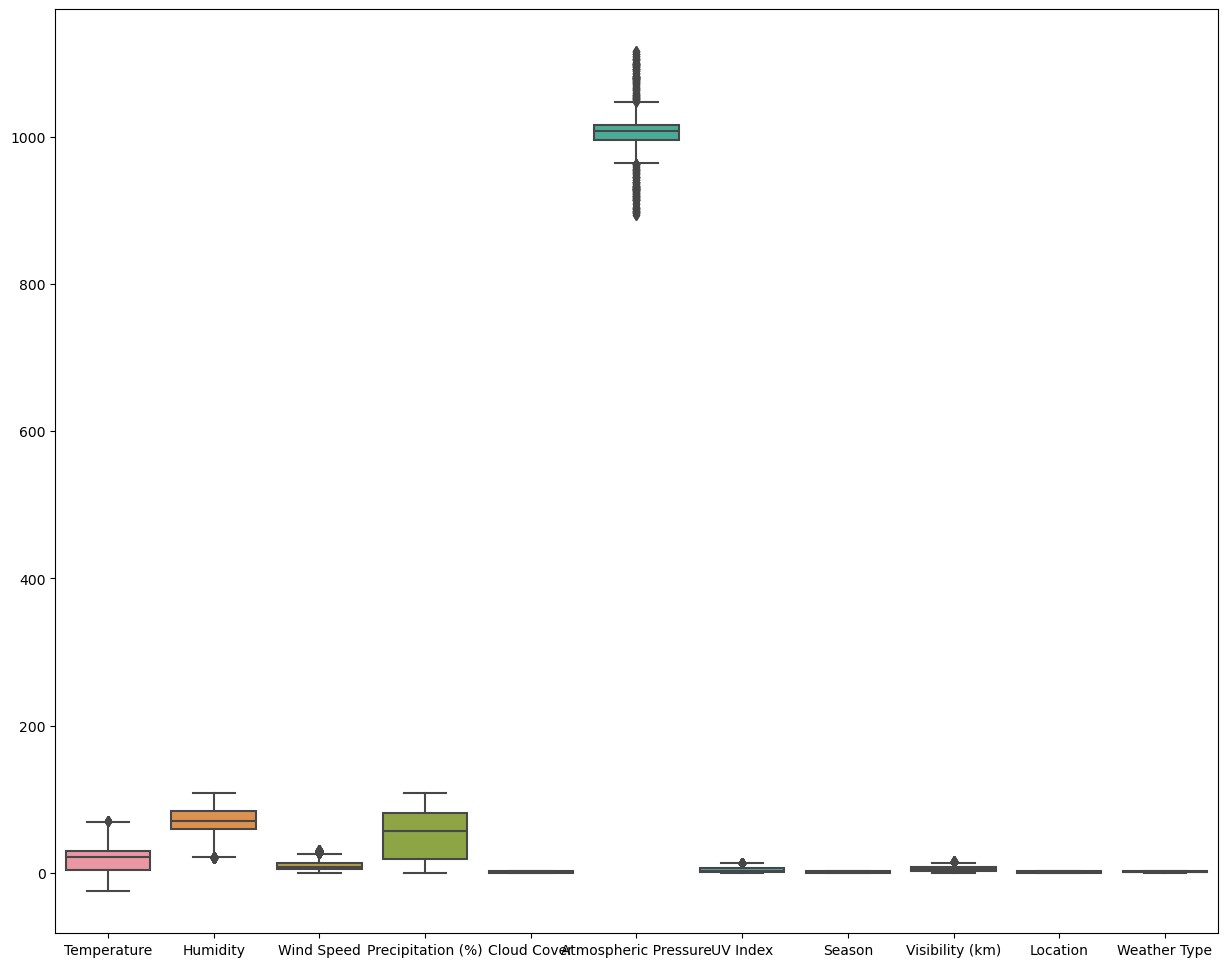

In [48]:
plt.figure(figsize=(15,12))
sns.boxplot(data=df_no_outliers)

In [49]:
df_no_outliers.shape

(12151, 11)

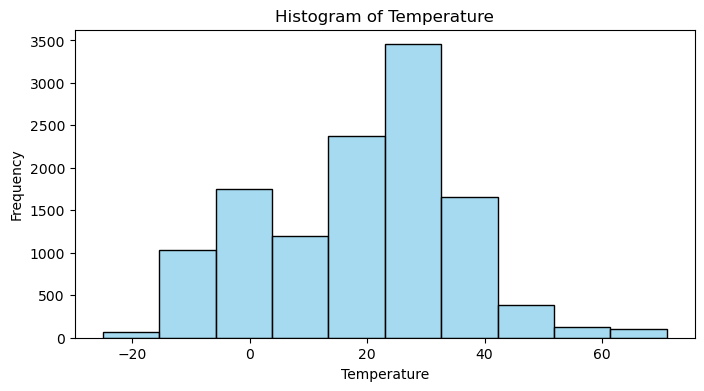

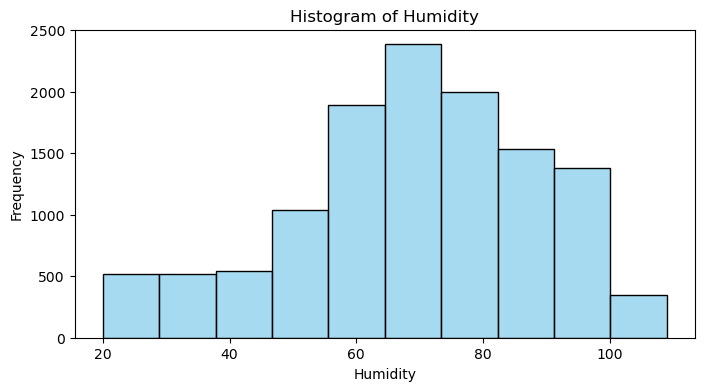

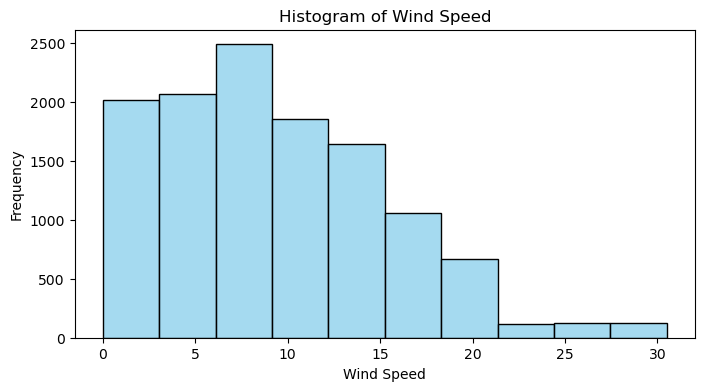

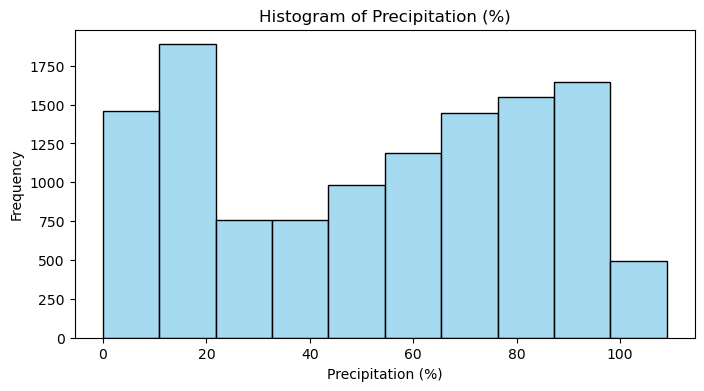

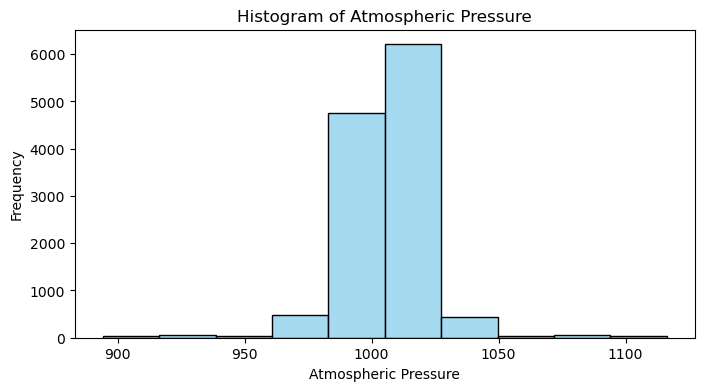

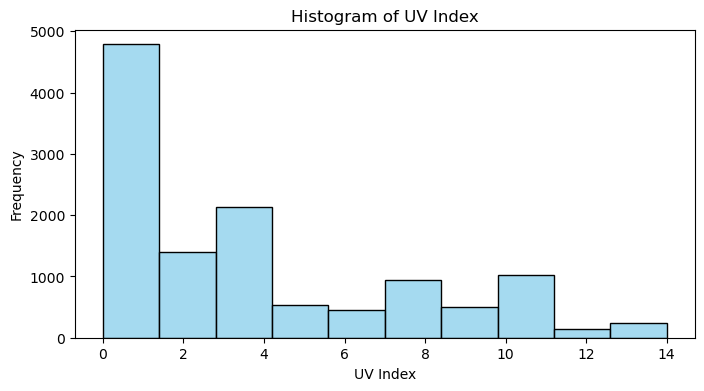

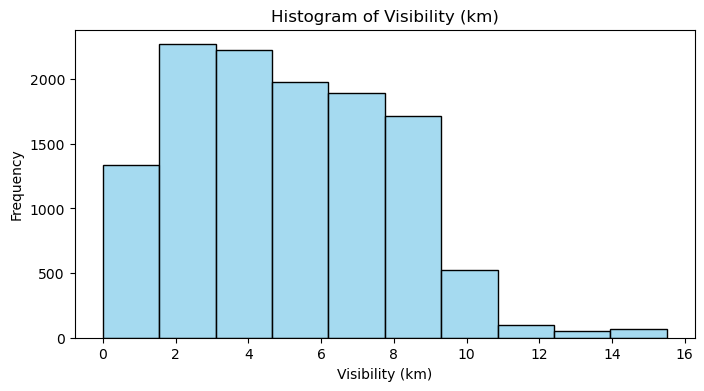

In [55]:
numerical_columns = ['Temperature', 'Humidity', 'Wind Speed', 'Precipitation (%)', 'Atmospheric Pressure', 'UV Index', 'Visibility (km)']

for column in numerical_columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(df_no_outliers[column], kde=False, bins=10, color='skyblue')
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

Text(0.5, 1.0, 'Correlation Matrix')

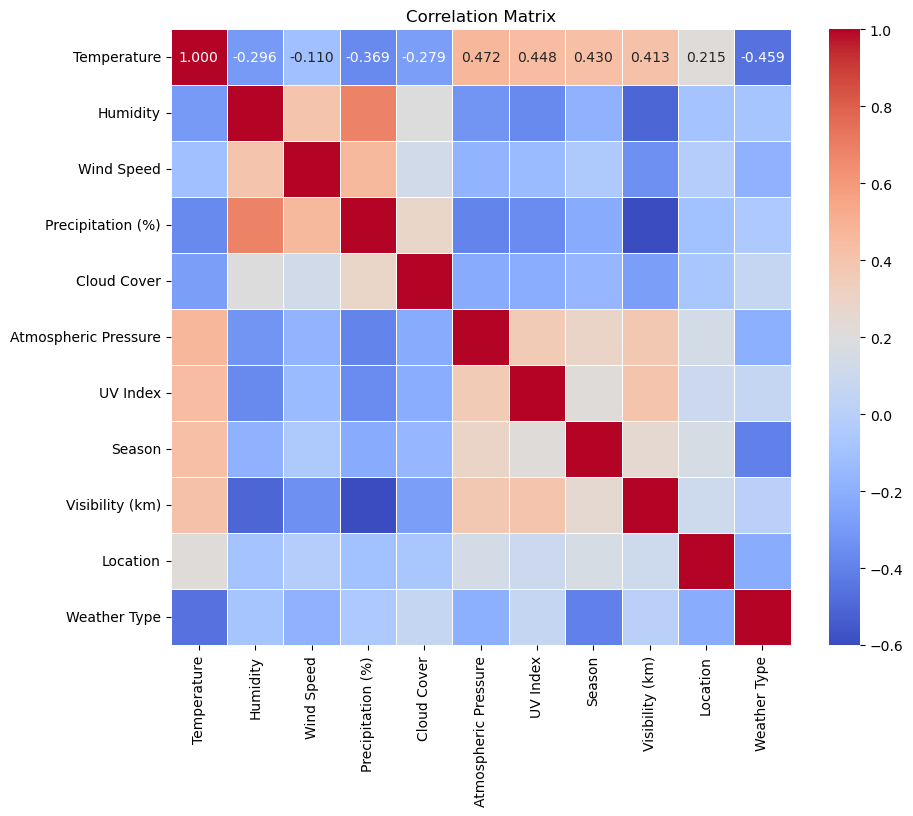

In [56]:
plt.figure(figsize=(10, 8))
sns.heatmap(df_no_outliers.corr(numeric_only = True), annot=True, cmap='coolwarm', fmt='.3f', linewidths=0.5)
plt.title('Correlation Matrix')

# DATA SPLIT

In [57]:
df.columns

Index(['Temperature', 'Humidity', 'Wind Speed', 'Precipitation (%)',
       'Cloud Cover', 'Atmospheric Pressure', 'UV Index', 'Season',
       'Visibility (km)', 'Location', 'Weather Type'],
      dtype='object')

In [108]:
X = df_no_outliers[['Temperature', 'Humidity', 'Wind Speed', 'Precipitation (%)',
       'Cloud Cover', 'Atmospheric Pressure', 'UV Index', 'Season',
       'Visibility (km)', 'Location']]
y = df_no_outliers['Weather Type']

In [109]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Model Traninig

In [110]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

## Linear Regression

In [111]:
from sklearn.linear_model import LogisticRegression

In [112]:
model = LogisticRegression()

In [113]:
model.fit(X_train, y_train)

LogisticRegression()

In [114]:
y_pred = model.predict(X_test)

In [115]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [116]:
accuracy = accuracy_score(y_test,y_pred)

In [117]:
accuracy

0.9251644736842105

In [118]:
confusion = confusion_matrix(y_test,y_pred)

In [119]:
confusion

array([[271,  10,   6,   6],
       [ 13, 297,  18,   1],
       [ 11,  13, 261,   4],
       [  0,   2,   7, 296]], dtype=int64)

In [120]:
report = classification_report(y_test,y_pred)

In [121]:
print(report)

              precision    recall  f1-score   support

           0       0.92      0.92      0.92       293
           1       0.92      0.90      0.91       329
           2       0.89      0.90      0.90       289
           3       0.96      0.97      0.97       305

    accuracy                           0.93      1216
   macro avg       0.92      0.93      0.92      1216
weighted avg       0.93      0.93      0.93      1216



## KNN

In [122]:
from sklearn.neighbors import KNeighborsClassifier

In [123]:
knn = KNeighborsClassifier(n_neighbors=7)

In [124]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=7)

In [125]:
y_pred = knn.predict(X_test)

In [126]:
accuracy = accuracy_score(y_test,y_pred)
accuracy

0.9333881578947368

In [127]:
confusion = confusion_matrix(y_test,y_pred)
confusion

array([[271,  12,   6,   4],
       [ 18, 302,   8,   1],
       [  9,  12, 265,   3],
       [  2,   2,   4, 297]], dtype=int64)

In [128]:
report = classification_report(y_test,y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.90      0.92      0.91       293
           1       0.92      0.92      0.92       329
           2       0.94      0.92      0.93       289
           3       0.97      0.97      0.97       305

    accuracy                           0.93      1216
   macro avg       0.93      0.93      0.93      1216
weighted avg       0.93      0.93      0.93      1216



## Decision Tree

In [129]:
from sklearn.tree import DecisionTreeClassifier

In [130]:
dt_classifier = DecisionTreeClassifier(random_state=42)

In [131]:
dt_classifier.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [132]:
y_pred = dt_classifier.predict(X_test)

In [133]:
accuracy = accuracy_score(y_test,y_pred)
accuracy

0.9424342105263158

In [134]:
confusion = confusion_matrix(y_test,y_pred)
confusion

array([[270,  18,   2,   3],
       [  8, 305,  10,   6],
       [  3,   7, 276,   3],
       [  4,   4,   2, 295]], dtype=int64)

In [135]:
report = classification_report(y_test,y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.95      0.92      0.93       293
           1       0.91      0.93      0.92       329
           2       0.95      0.96      0.95       289
           3       0.96      0.97      0.96       305

    accuracy                           0.94      1216
   macro avg       0.94      0.94      0.94      1216
weighted avg       0.94      0.94      0.94      1216



## Rrandom Forest

In [136]:
from sklearn.ensemble import RandomForestClassifier

In [137]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

In [138]:
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [139]:
y_pred = rf_classifier.predict(X_test)

In [140]:
accuracy = accuracy_score(y_test,y_pred)
accuracy

0.9539473684210527

In [141]:
confusion = confusion_matrix(y_test,y_pred)
confusion

array([[275,  13,   4,   1],
       [  9, 312,   5,   3],
       [  5,   8, 275,   1],
       [  2,   1,   4, 298]], dtype=int64)

In [142]:
report = classification_report(y_test,y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.95      0.94      0.94       293
           1       0.93      0.95      0.94       329
           2       0.95      0.95      0.95       289
           3       0.98      0.98      0.98       305

    accuracy                           0.95      1216
   macro avg       0.95      0.95      0.95      1216
weighted avg       0.95      0.95      0.95      1216



## SVM

In [143]:
from sklearn.svm import SVC

In [94]:
svm = SVC(kernel='linear', random_state=42) 
svm.fit(X_train, y_train)

SVC(kernel='linear', random_state=42)

In [95]:
y_pred = svm.predict(X_test)

In [96]:
accuracy = accuracy_score(y_test,y_pred)
print(accuracy)

confusion = confusion_matrix(y_test,y_pred)
print(confusion)

report = classification_report(y_test,y_pred)
print(report)

0.8772727272727273
[[279   9  10  13]
 [ 25 251  29   8]
 [ 23  21 290   6]
 [  3   3  12 338]]
              precision    recall  f1-score   support

           0       0.85      0.90      0.87       311
           1       0.88      0.80      0.84       313
           2       0.85      0.85      0.85       340
           3       0.93      0.95      0.94       356

    accuracy                           0.88      1320
   macro avg       0.88      0.88      0.88      1320
weighted avg       0.88      0.88      0.88      1320



## Naive Bayes

In [97]:
from sklearn.naive_bayes import GaussianNB

In [98]:
nb = GaussianNB()
nb.fit(X_train, y_train)

GaussianNB()

In [99]:
y_pred = nb.predict(X_test)

In [100]:
accuracy = accuracy_score(y_test,y_pred)
print(accuracy)

confusion = confusion_matrix(y_test,y_pred)
print(confusion)

report = classification_report(y_test,y_pred)
print(report)

0.8666666666666667
[[263  14  11  23]
 [ 31 249  27   6]
 [ 29  12 296   3]
 [  5   2  13 336]]
              precision    recall  f1-score   support

           0       0.80      0.85      0.82       311
           1       0.90      0.80      0.84       313
           2       0.85      0.87      0.86       340
           3       0.91      0.94      0.93       356

    accuracy                           0.87      1320
   macro avg       0.87      0.86      0.86      1320
weighted avg       0.87      0.87      0.87      1320



## AdaBoost

In [101]:
from sklearn.ensemble import AdaBoostClassifier

In [102]:
base_estimator = DecisionTreeClassifier(max_depth=1)
ada = AdaBoostClassifier(base_estimator=base_estimator, n_estimators=50, random_state=42)

In [103]:
ada.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1),
                   random_state=42)

In [104]:
y_pred = ada.predict(X_test)

In [105]:
accuracy = accuracy_score(y_test,y_pred)
print(accuracy)

confusion = confusion_matrix(y_test,y_pred)
print(confusion)

report = classification_report(y_test,y_pred)
print(report)

0.8462121212121212
[[276  17   6  12]
 [ 37 249  17  10]
 [ 20  46 264  10]
 [ 18   2   8 328]]
              precision    recall  f1-score   support

           0       0.79      0.89      0.83       311
           1       0.79      0.80      0.79       313
           2       0.89      0.78      0.83       340
           3       0.91      0.92      0.92       356

    accuracy                           0.85      1320
   macro avg       0.85      0.85      0.84      1320
weighted avg       0.85      0.85      0.85      1320



## Logistic Regression

In [106]:
from sklearn.linear_model import LogisticRegression

In [107]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

LogisticRegression()

In [144]:
y_pred = log_reg.predict(X_test)

In [145]:
accuracy = accuracy_score(y_test,y_pred)
print(accuracy)

confusion = confusion_matrix(y_test,y_pred)
print(confusion)

report = classification_report(y_test,y_pred)
print(report)

0.9095394736842105
[[268  12   6   7]
 [ 18 281  26   4]
 [ 13  10 261   5]
 [  0   3   6 296]]
              precision    recall  f1-score   support

           0       0.90      0.91      0.91       293
           1       0.92      0.85      0.89       329
           2       0.87      0.90      0.89       289
           3       0.95      0.97      0.96       305

    accuracy                           0.91      1216
   macro avg       0.91      0.91      0.91      1216
weighted avg       0.91      0.91      0.91      1216

